In [131]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [132]:

# Leer la hoja "Training_Data"
df = pd.read_excel("./user_knowledge_modeling/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet_name="Training_Data")
columns_to_drop = ["Unnamed: 6", "Unnamed: 7", "Attribute Information:"]
df = df.drop(columns=columns_to_drop )

# Leer la hoja "Test_Data"
# df_test = pd.read_excel("./user_knowledge_modeling/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet_name="Test_Data")
# df_test =df_test.drop(columns=columns_to_drop)

print(df.head())
# print(df_test.head())



    STG   SCG   STR   LPR   PEG       UNS
0  0.00  0.00  0.00  0.00  0.00  very_low
1  0.08  0.08  0.10  0.24  0.90      High
2  0.06  0.06  0.05  0.25  0.33       Low
3  0.10  0.10  0.15  0.65  0.30    Middle
4  0.08  0.08  0.08  0.98  0.24       Low


Si cargaste el conjunto de datos como df, para considerar solo las variables independientes puedes hacer:

In [133]:
# Only get the columns with independent variables

X = df.drop(columns=[" UNS"])
X.head()



,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


Para realizar un estudio con los modelos no supervisados mencionados, primero determina el número de clases únicas en tu conjunto de datos:

In [134]:
n_clusters = df[' UNS'].nunique()
print(n_clusters)

4


In [135]:
# Normalize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

¿El número de clústeres sería el adecuado con los datos disponibles?
 Para determinar el número óptimo de clusters, se utiliza el método de la regla del codo:


c:\Users\Aleja\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aleja\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Aleja\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Aleja\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

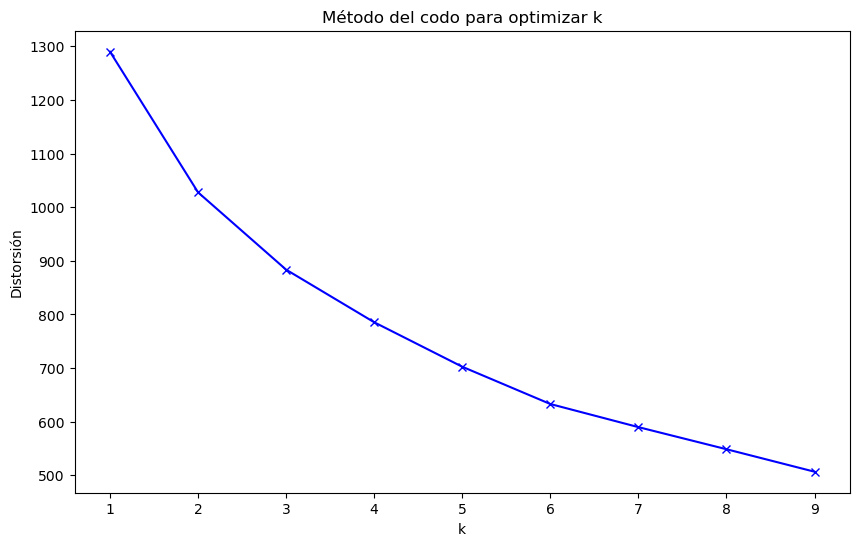

In [136]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters)  # Asume que deseas 3 clusters
kmeans.fit(X_scaled)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Método del codo para optimizar k')
plt.show()


In [137]:
import numpy  as np
# Calcular la distancia de cada punto a la línea formada por el primer y último punto
def calc_distance(x1, y1, a, b, c):
    return abs(a*x1 + b*y1 + c) / np.sqrt(a*a + b*b)

# Coordenadas de inicio y fin
x1, y1 = 1, distortions[0]
x2, y2 = 9, distortions[-1]

# Coeficientes de la línea
a = y2 - y1
b = x1 - x2
c = (x1*(y1 - y2) + y1*(x2 - x1))

# Distancias de cada punto a la línea
distances = [calc_distance(K[i], distortions[i], a, b, c) for i in range(len(K))]

# Punto con la distancia máxima
optimal_k = distances.index(max(distances)) + 1

print(f"El número óptimo de clusters según el método del codo es: {optimal_k} y el numero real de las clases del dataset son {n_clusters} {'son iguales' if optimal_k == n_clusters else 'son distintos'}")

El número óptimo de clusters según el método del codo es: 4 y el numero real de las clases del dataset son 4 son iguales


¿Se corresponden los clústeres en los que han sido incluidos los patrones con las clases a la que realmente pertenecen?
Para justificar gráficamente la respuesta utilizando PCA:

c:\Users\Aleja\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


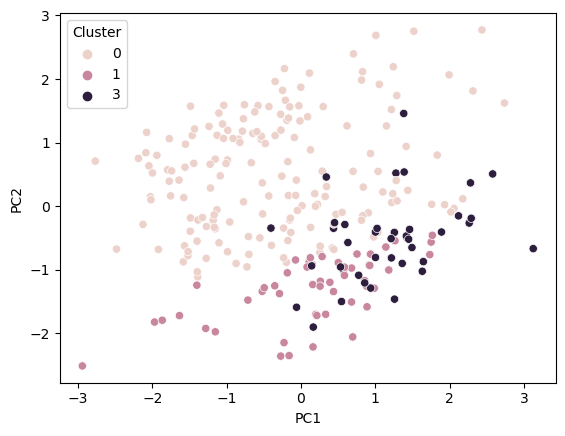

In [138]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.predict(X)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)
plt.show()


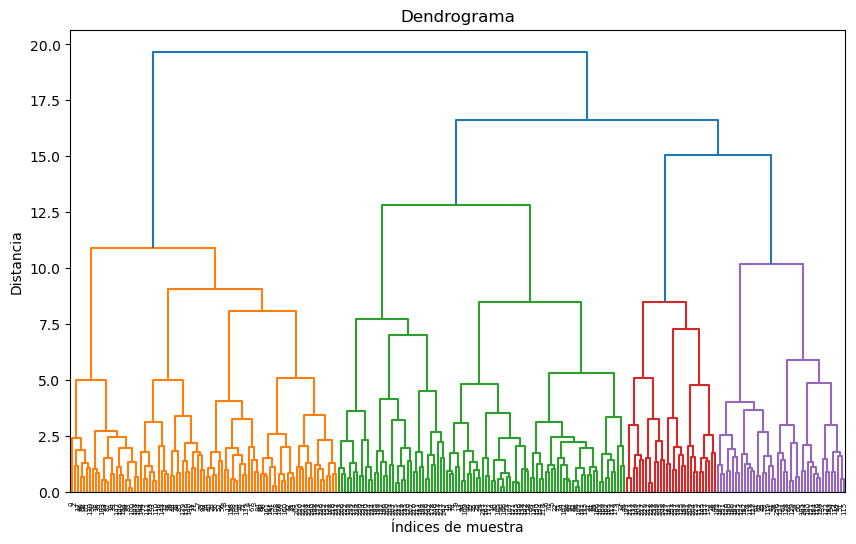

In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Definir la matriz de linkage
linked = linkage(X_scaled, 'ward') # 'ward' minimiza las varianzas de los clusters que se fusionan

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Índices de muestra')
plt.ylabel('Distancia')
plt.show()


In [140]:
from sklearn.cluster import AgglomerativeClustering

# Suponiendo que el número óptimo de clusters es 3
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X)

# Comparación con las clases reales
df['Cluster_Labels'] = cluster_labels
cross_tab = pd.crosstab(df['Cluster_Labels'], df[' UNS'])
print(cross_tab)


 UNS            High  Low  Middle  very_low
Cluster_Labels                             
0                 29   41      17         4
1                 34   12      64         1
2                  0   30       7        19


c:\Users\Aleja\miniconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
